# Exploratory Data Analysis

In [1]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

import os
import gc

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import image

In [4]:
train_dir = '/Users/arencarpenter/Desktop/Detecting_ALL_with_CNN/Data/training'
test_dir = '/Users/arencarpenter/Desktop/Detecting_ALL_with_CNN/Data/testing'
val_dir = '/Users/arencarpenter/Desktop/Detecting_ALL_with_CNN/Data/validation'

In [5]:
# pull a few images from training
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/normal')]
all_imgs = [fn for fn in os.listdir(f'{train_dir}/all')]

select_normal = np.random.choice(normal_imgs, 3, replace = False)
select_all = np.random.choice(all_imgs, 3, replace = False)

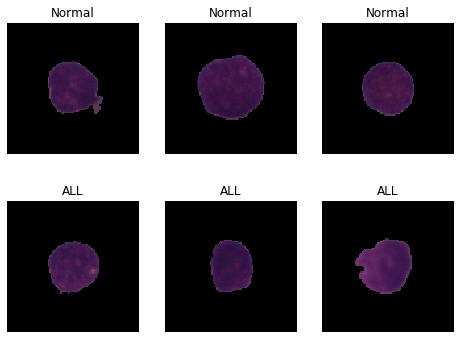

In [6]:
fig = plt.figure(figsize = (8,6))

for i in range(6):
    if i < 3:
        fp = f'{train_dir}/normal/{select_normal[i]}'
        label = 'Normal'
    else:
        fp = f'{train_dir}/all/{select_all[i-3]}'
        label = 'ALL'
    ax = fig.add_subplot(2, 3, i+1)
    fn = image.load_img(fp, target_size = (100,100),
                        color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

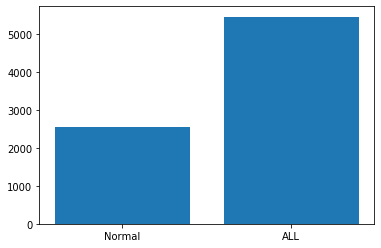

In [7]:
plt.bar(['Normal', 'ALL'], [len(normal_imgs), len(all_imgs)], )
plt.show()

In [8]:
def img2np(pwd, fn_list, size = (32, 32)):
    for fn in fn_list:
        fp = pwd + fn
        current_image = image.load_img(fp, 
                                       target_size = size, 
                                       color_mode = 'grayscale')
        img_ts = image.img_to_array(current_image)
        img_ts = [img_ts.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            full_mat = img_ts
    return full_mat

In [27]:
normal_images = img2np(f'{train_dir}/normal/', normal_imgs)
all_images = img2np(f'{train_dir}/all/', all_imgs)

In [33]:
normal_images = normal_images[:25]
all_images = all_images[:25]

In [34]:
normal_images.shape

(25, 1024)

In [35]:
1024/32

32.0

In [43]:
def find_mean_img(image_vecs, title, size = (32,32)):
    mean_img = np.mean(image_vecs, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

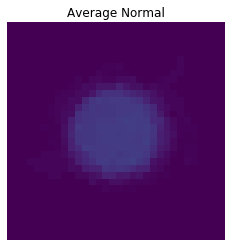

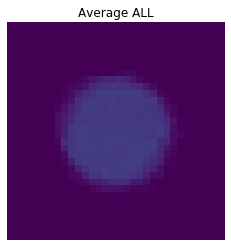

In [44]:
norm_mean = find_mean_img(normal_images, 'Normal')
pneu_mean = find_mean_img(all_images, 'ALL')